# Investigating the Cybersecurity Intrusion Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

# Comment created in john-feature branch

In [2]:
df = pd.read_csv('../data/cybersecurity_intrusion_data.csv')
df.head(3)

,session_id,network_packet_size,protocol_type,login_attempts,session_duration,encryption_used,ip_reputation_score,failed_logins,browser_type,unusual_time_access,attack_detected
0,SID_00001,599,TCP,4,492.983263,DES,0.606818,1,Edge,0,1
1,SID_00002,472,TCP,3,1557.996461,DES,0.301569,0,Firefox,0,0
2,SID_00003,629,TCP,3,75.044262,DES,0.739164,2,Chrome,0,1


In [24]:
# Save the first 5 rows of the data to a new csv file
df.head().to_csv('../data/first_five_rows.csv')

### Examine the dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9537 entries, 0 to 9536
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   session_id           9537 non-null   object 
 1   network_packet_size  9537 non-null   int64  
 2   protocol_type        9537 non-null   object 
 3   login_attempts       9537 non-null   int64  
 4   session_duration     9537 non-null   float64
 5   encryption_used      7571 non-null   object 
 6   ip_reputation_score  9537 non-null   float64
 7   failed_logins        9537 non-null   int64  
 8   browser_type         9537 non-null   object 
 9   unusual_time_access  9537 non-null   int64  
 10  attack_detected      9537 non-null   int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 819.7+ KB


### Check the shape of the dataframe

In [4]:
df.shape

(9537, 11)

### Drop the session_id feature

In [5]:
# Drop the 'session_id' column
df.drop('session_id', axis=1, inplace=True)
df.columns

Index(['network_packet_size', 'protocol_type', 'login_attempts',
       'session_duration', 'encryption_used', 'ip_reputation_score',
       'failed_logins', 'browser_type', 'unusual_time_access',
       'attack_detected'],
      dtype='object')

### Check for null values

The feature 'encryption_used' is the only feature that suffers from null values.


In [6]:
df.isnull().sum()

network_packet_size       0
protocol_type             0
login_attempts            0
session_duration          0
encryption_used        1966
ip_reputation_score       0
failed_logins             0
browser_type              0
unusual_time_access       0
attack_detected           0
dtype: int64

In [7]:
df['encryption_used'].value_counts()

encryption_used
AES    4706
DES    2865
Name: count, dtype: int64

### Let's replace null values in the encryption_used feature with 'unknown'

In [8]:
# Replace null values in the 'encryption_used' column with a new value 'unknown'
df.fillna({'encryption_used': 'unknown'}, inplace=True)

# And check the result
df.isnull().sum()

network_packet_size    0
protocol_type          0
login_attempts         0
session_duration       0
encryption_used        0
ip_reputation_score    0
failed_logins          0
browser_type           0
unusual_time_access    0
attack_detected        0
dtype: int64

### 

### Let's check the value counts of the categorical variables

In [9]:
# Check the value counts of the categorical variables
for column in df.select_dtypes(include='object').columns:
    print(f'{column}:\n{df[column].value_counts()}\n')

protocol_type:
protocol_type
TCP     6624
UDP     2406
ICMP     507
Name: count, dtype: int64

encryption_used:
encryption_used
AES        4706
DES        2865
unknown    1966
Name: count, dtype: int64

browser_type:
browser_type
Chrome     5137
Firefox    1944
Edge       1469
Unknown     502
Safari      485
Name: count, dtype: int64



In [10]:
# Use one-hot encoding to convert the categorical variables into numerical ones
# Use the sklearn library to do this
from sklearn.preprocessing import OneHotEncoder

# Create the OneHotEncoder object
encoder = OneHotEncoder(drop='first', sparse_output=False)

categorical_columns = df.select_dtypes(include='object').columns.to_list()

one_hot_encoded = encoder.fit_transform(df[categorical_columns])

one_hot_encoded_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_columns))

df_encoded = pd.concat([df, one_hot_encoded_df], axis=1)
df_encoded.drop(categorical_columns, axis=1, inplace=True)

categorical_columns

['protocol_type', 'encryption_used', 'browser_type']

In [11]:
# Create a new dataframe with only the numeric columns
df_numeric = df_encoded

# Show the correlation matrix
df_numeric_corr = df_numeric.corr()
df_numeric_corr


,network_packet_size,login_attempts,session_duration,ip_reputation_score,failed_logins,unusual_time_access,attack_detected,protocol_type_TCP,protocol_type_UDP,encryption_used_DES,encryption_used_unknown,browser_type_Edge,browser_type_Firefox,browser_type_Safari,browser_type_Unknown
network_packet_size,1.000000,-0.001890,0.021650,0.002320,-0.011676,-0.001255,-0.006798,-0.017863,0.016565,0.009977,0.008647,-0.005308,0.017610,0.013130,0.002234
login_attempts,-0.001890,1.000000,0.006392,-0.002618,-0.013507,0.007349,0.277320,-0.023837,0.026665,0.002339,0.000254,0.000720,0.002735,-0.007188,-0.004092
session_duration,0.021650,0.006392,1.000000,-0.005077,0.019375,0.012930,0.041602,0.010986,-0.007982,-0.008657,0.008510,-0.012287,-0.001914,0.010599,0.003758
ip_reputation_score,0.002320,-0.002618,-0.005077,1.000000,0.015613,-0.003146,0.211540,-0.022273,0.030000,-0.011392,0.006522,0.002337,0.001258,0.017507,-0.007540
failed_logins,-0.011676,-0.013507,0.019375,0.015613,1.000000,0.006131,0.363726,0.010408,-0.009051,0.005216,-0.010514,0.002919,-0.002404,0.004561,-0.003144
unusual_time_access,-0.001255,0.007349,0.012930,-0.003146,0.006131,1.000000,0.008652,-0.005240,0.004219,-0.001656,-0.004201,0.005479,0.002561,0.000372,-0.014824
attack_detected,-0.006798,0.277320,0.041602,0.211540,0.363726,0.008652,1.000000,0.000643,0.007903,0.008306,0.016161,-0.008057,-0.010556,-0.013289,0.134630
protocol_type_TCP,-0.017863,-0.023837,0.010986,-0.022273,0.010408,-0.005240,0.000643,1.000000,-0.875916,0.002032,0.013224,0.013681,0.005526,0.009470,-0.021070
protocol_type_UDP,0.016565,0.026665,-0.007982,0.030000,-0.009051,0.004219,0.007903,-0.875916,1.000000,0.000640,-0.018491,-0.008427,0.000340,-0.006985,0.023087
encryption_used_DES,0.009977,0.002339,-0.008657,-0.011392,0.005216,-0.001656,0.008306,0.002032,0.000640,1.000000,-0.333925,0.004245,0.010223,-0.008014,-0.015164


### Visualize the correlation matrix as a heatmap

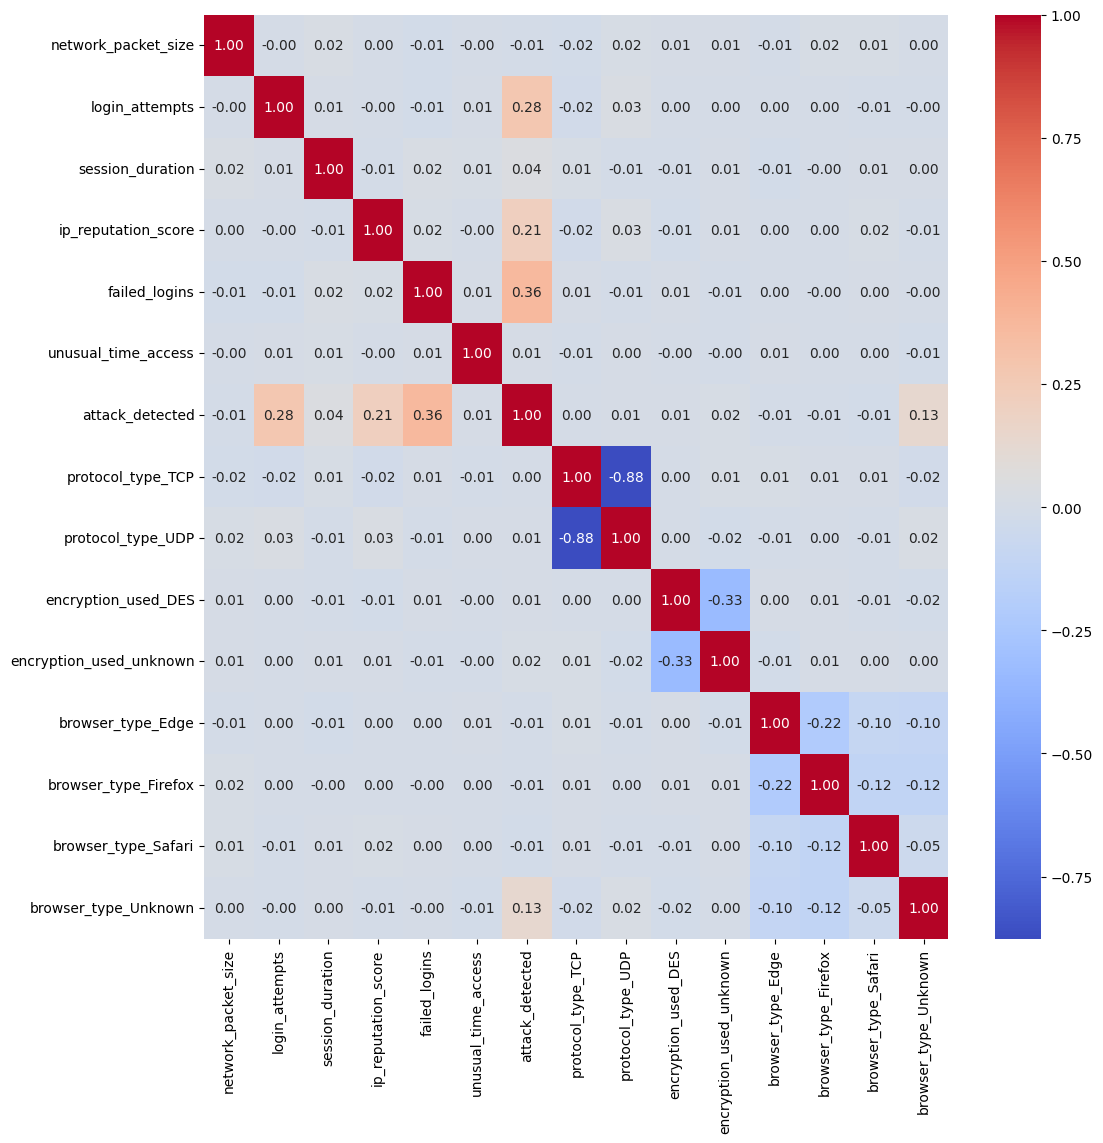

In [12]:
# Create a heatmap of the correlation matrix, with values correct to 2 decimal places
plt.figure(figsize=(12, 12))
sns.heatmap(df_numeric_corr, annot=True, cmap='coolwarm', fmt='.2f')

# Save the heatmap image to file
plt.savefig('../images/heatmap.png')

### Create a pipeline to preprocess the data and train a model

In [13]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer

def pipeline_logistic_regression():
    """
    Create a pipeline for logistic regression.

    Returns:
        pipeline (Pipeline): A pipeline object that consists of feature scaling, feature selection, and logistic regression model.
    """
    
    categorical_features = df.select_dtypes(include='object').columns
    print(categorical_features)

    numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
    numerical_features = numerical_features.drop('attack_detected')
    print(numerical_features)
    
    # Create transformers
    categorical_transformer = OneHotEncoder(handle_unknown='ignore')
    numerical_transformer = StandardScaler()
    
    # Combine transformations using ColumnTransformer
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numerical_transformer, numerical_features),
            ('cat', categorical_transformer, categorical_features)
        ]
    )
    
        
    pipeline = Pipeline(
        [
            ("preprocessor", preprocessor),
            # ("feature_selection", SelectFromModel(LogisticRegression(random_state=101))),
            ("model", LogisticRegression(random_state=101)),
        ]
    )
    
    

    return pipeline




### Split the data into train and test sets, and fit the pipeline

In [14]:
# split the data into training and testing sets
from sklearn.model_selection import train_test_split

X = df.drop('attack_detected', axis=1)

y = df['attack_detected']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

pipeline = pipeline_logistic_regression()
pipeline.fit(X_train, y_train)

Index(['protocol_type', 'encryption_used', 'browser_type'], dtype='object')
Index(['network_packet_size', 'login_attempts', 'session_duration',
       'ip_reputation_score', 'failed_logins', 'unusual_time_access'],
      dtype='object')


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['network_packet_size', 'login_attempts', 'session_duration',
       'ip_reputation_score', 'failed_logins', 'unusual_time_access'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['protocol_type', 'encryption_used', 'browser_type'], dtype='object'))])),
                ('model', LogisticRegression(random_state=101))])

Create a function to get the coefficients from the model

In [15]:
def logistic_regression_coef(model, columns):
    """
    Prints the coefficients of a logistic regression model.

    Parameters:
    - model: The trained logistic regression model.
    - columns: The column names corresponding to the coefficients.

    Returns:
    None
    """
    coeff_df = pd.DataFrame(
        model.coef_, index=["Coefficient"], columns=columns
    ).T.sort_values(["Coefficient"], key=abs, ascending=False)
    print(coeff_df)

In [16]:
logistic_regression_coef(
    model=pipeline["model"],
    columns=pipeline["preprocessor"].get_feature_names_out(),
)


                              Coefficient
cat__browser_type_Unknown        1.434387
num__failed_logins               1.006663
num__login_attempts              0.785050
num__ip_reputation_score         0.572452
cat__browser_type_Safari        -0.517531
cat__browser_type_Edge          -0.321258
cat__browser_type_Firefox       -0.315247
cat__browser_type_Chrome        -0.313979
cat__protocol_type_ICMP         -0.109423
cat__encryption_used_AES        -0.109289
num__session_duration            0.094870
cat__protocol_type_TCP           0.067447
cat__encryption_used_unknown     0.064580
num__unusual_time_access         0.033093
num__network_packet_size        -0.026275
cat__encryption_used_DES         0.011080
cat__protocol_type_UDP           0.008348


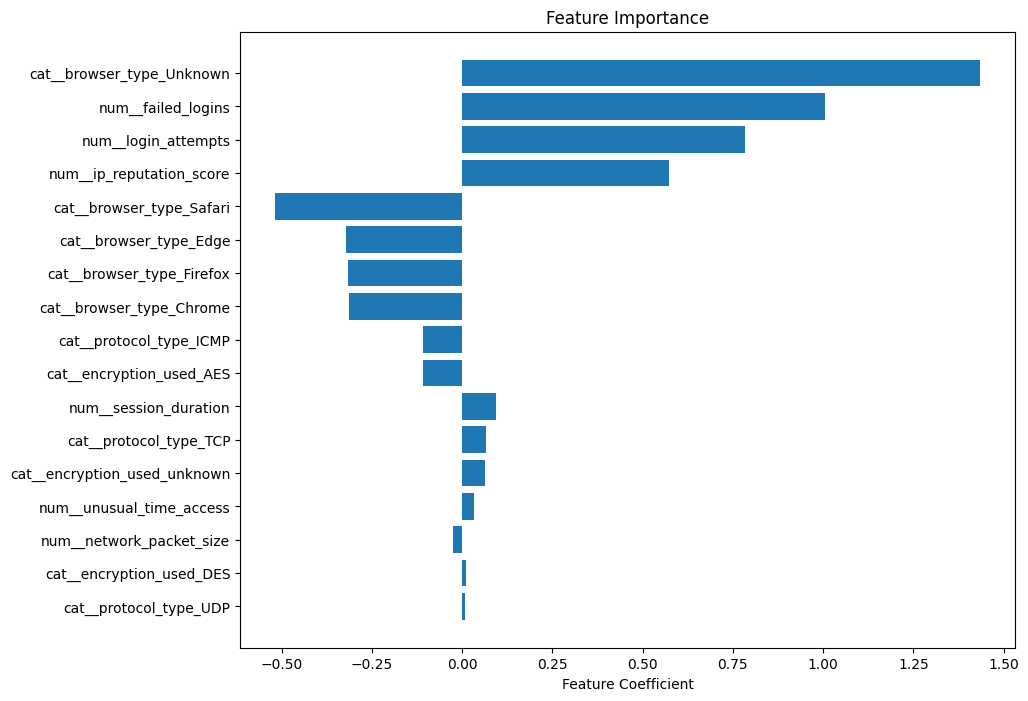

In [ ]:
# Show the most important features in a bar plot

def plot_feature_importance(model, columns):
    """
    Plots the feature importance of a model.

    Parameters:
    - model: The trained model.
    - columns: The column names corresponding to the feature importance.

    Returns:
    None
    """
    feature_importance = model.coef_.ravel()
    sorted_idx = np.argsort(np.abs(feature_importance))

    plt.figure(figsize=(12, 8))
    plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align="center")
    plt.yticks(range(len(sorted_idx)), np.array(columns)[sorted_idx])
    plt.xlabel("Feature Coefficient")
    plt.title("Feature Importance")
    plt.savefig('../images/feature_importance.png')  # Save the plot to file before showing it
    plt.show()

plot_feature_importance(
    model=pipeline["model"],
    columns=pipeline["preprocessor"].get_feature_names_out(),
)



### Generate the classification report and view the confusion matrix

In [18]:
pipeline["preprocessor"].get_feature_names_out()

array(['num__network_packet_size', 'num__login_attempts',
       'num__session_duration', 'num__ip_reputation_score',
       'num__failed_logins', 'num__unusual_time_access',
       'cat__protocol_type_ICMP', 'cat__protocol_type_TCP',
       'cat__protocol_type_UDP', 'cat__encryption_used_AES',
       'cat__encryption_used_DES', 'cat__encryption_used_unknown',
       'cat__browser_type_Chrome', 'cat__browser_type_Edge',
       'cat__browser_type_Firefox', 'cat__browser_type_Safari',
       'cat__browser_type_Unknown'], dtype=object)

### Try predicting a new datapoint

In [19]:
X_new = pd.DataFrame({
    'network_packet_size': [599],
    'protocol_type': ['TCP'],
    'login_attempts': [3],
    'session_duration': [1557],
    'encryption_used': ['DES'],
    'ip_reputation_score': [0.301568],
    'failed_logins': [0],
    'browser_type': ['Firefox'],
    'unusual_time_access': [0],
})

categorical_features = df.select_dtypes(include='object').columns
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.drop('attack_detected')

expected_features = list(numerical_features) + list(categorical_features)
X_new = X_new.reindex(columns=expected_features, fill_value=np.nan)  # Fill missing columns with NaN

prediction = pipeline.predict(X_new)
print(prediction)

probabilites = pipeline.predict_proba(X_new)
print("Probabilities of each class:", probabilites)

[0]
Probabilities of each class: [[0.8988224 0.1011776]]


In [20]:
df['unusual_time_access'].value_counts()
df.dtypes

network_packet_size      int64
protocol_type           object
login_attempts           int64
session_duration       float64
encryption_used         object
ip_reputation_score    float64
failed_logins            int64
browser_type            object
unusual_time_access      int64
attack_detected          int64
dtype: object

In [21]:
# loads confusion_matrix and classification_report from sklearn
from sklearn.metrics import classification_report, confusion_matrix


def confusion_matrix_and_report(X, y, pipeline, label_map):
    """
    Gets features, target, pipeline, and how the levels from your target are labelled (named).
    In this case, 0 (Malignant) and 1 (Benign), so you parse a list ['Malignant' , 'Benign'].

    Args:
        X (array-like): The input features.
        y (array-like): The target values.
        pipeline (object): The trained pipeline model.
        label_map (list): The list of labels for the target values.

    Returns:
        None

    This function performs the following steps:
    - Predicts the target values based on the input features using the provided pipeline.
    - Computes and displays the confusion matrix, which compares the predicted values with the actual values.
      The predicted values are shown as rows, and the actual values are shown as columns in the matrix.
    - Displays the classification report, which provides metrics such as precision, recall, and F1-score.

    """

    prediction = pipeline.predict(X)

    print("---  Confusion Matrix  ---")
    print(
        pd.DataFrame(
            confusion_matrix(y_true=prediction, y_pred=y),
            columns=[["Actual " + sub for sub in label_map]],
            index=[["Prediction " + sub for sub in label_map]],
        )
    )
    print("\n")

    print("---  Classification Report  ---")
    print(classification_report(y, prediction, target_names=label_map), "\n")


def clf_performance(X_train, y_train, X_test, y_test, pipeline, label_map):
    """
    Calculates and displays the performance metrics of a classification model.

    Parameters:
    - X_train (array-like): The feature matrix of the training set.
    - y_train (array-like): The target labels of the training set.
    - X_test (array-like): The feature matrix of the test set.
    - y_test (array-like): The target labels of the test set.
    - pipeline (object): The trained classification pipeline.
    - label_map (list): A list containing the labels for the target variable.

    Returns:
    None

    This function calculates and displays the confusion matrix and classification report
    for both the training set and the test set. The confusion matrix provides a summary
    of the model's performance by showing the number of true positives, true negatives,
    false positives, and false negatives. The classification report provides additional
    performance metrics such as precision, recall, and F1-score.

    Example usage:
    clf_performance(X_train, y_train, X_test, y_test, pipeline, ['Malignant', 'Benign'])
    """
    print("#### Train Set #### \n")
    confusion_matrix_and_report(X_train, y_train, pipeline, label_map)
    
    print("#### Test Set ####\n")
    confusion_matrix_and_report(X_test, y_test, pipeline, label_map)

In [22]:
clf_performance(
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test,
    pipeline=pipeline,
    label_map=["Attack", "No Attack"],
)

#### Train Set #### 

---  Confusion Matrix  ---
                     Actual Attack Actual No Attack
Prediction Attack             3370             1114
Prediction No Attack           847             2298


---  Classification Report  ---
              precision    recall  f1-score   support

      Attack       0.75      0.80      0.77      4217
   No Attack       0.73      0.67      0.70      3412

    accuracy                           0.74      7629
   macro avg       0.74      0.74      0.74      7629
weighted avg       0.74      0.74      0.74      7629
 

#### Test Set ####

---  Confusion Matrix  ---
                     Actual Attack Actual No Attack
Prediction Attack              838              286
Prediction No Attack           218              566


---  Classification Report  ---
              precision    recall  f1-score   support

      Attack       0.75      0.79      0.77      1056
   No Attack       0.72      0.66      0.69       852

    accuracy                   